# LIT 2023: Datenanalyse mit Python

Gert-Ludwig Ingold




<div style="margin-top: 7em;font-size: smaller;">Quellen: github.com/gertingold/lit2023</div>

### Tabellenkalkulation

* in der Windowswelt: Microsoft™ Excel™
* in der Linuxwelt (und darüber hinaus): LibreOffice
* Macros in LibreOffice können in Basic und Python programmiert werden

Alternative:
* Datenanalyse unabhängig von einem Tabellenkalkulationsprogramm
* Python mit der pandas-Bibliothek
* zusätzlich Jupyter-Notebook zur Entwicklung des Workflows und/oder zur Dokumentation der Datenanalyse

### Das erste Bild eines schwarzen Loches
<table>
 <tr style="background-color:#ffffff;">
 <td>
 <img src="eso1907a.jpg" width="500">
 <small>Credit: EHT Collaboration</small>
 </td><td>
 <p>verwendete Software:</p>
 <p>DiFX, CALC, PolConvert, HOPS, CASA, AIPS, ParselTongue, GNU Parallel, GILDAS, eht-imaging, <b>Numpy</b>, Scipy, <b>Pandas</b>, Astropy, <b>Jupyter</b>, <b>Matplotlib</b></p>
 <small>EHT Collaboration, Astrophys. J. Lett. <b>875</b>, L3 (2019)</small>
 </td>
 </tr>
</table>

### Pandas

Dokumentation: https://pandas.pydata.org/

Möglichkeiten zur Installation:
* Debian/Ubuntu: Paket python3-pandas installieren
* Anaconda-Distribution enthält pandas → https://anaconda.org
* in einem virtual environment: `pip install pandas`

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

## Passagierzählung S-Bahn Hamburg
### aus dem Open-Data-Portal der Deutschen Bahn AG

Webseite zum Datensatz:<br>
https://data.deutschebahn.com/dataset/passagierzahlung-s-bahn-hamburg.html

Daten zu Ein- und Aussteigern an den Hamburger S-Bahn Stationen aus Zählfahrten. (Rohdaten aus den Meßfahrten - exemplarische Werte, keine Gesamtpassagierzahlen)


Link zum Datensatz:<br>
https://download-data.deutschebahn.com/static/datasets/personenzahlen/Passagierzahlen.csv

In [3]:
!head Passagierzahlen.csv

* Spalten sind durch Strichpunkte getrennt
* Encoding ist nicht UTF-8, sondern ISO8859
* Ein- und Aussteigerzahlen sind als Gleitkommazahlen angegeben, nicht als ganze Zahlen
* Es wird ein Dezimalkomma statt einem Dezimalpunkt verwendet
* Die Angabe des Datums erfolgt als String und erfordert für die weitere Verarbeitung eine Umwandlung in ein `datetime`-Objekt
* DS100 kurz: [Betriebsstellenverzeichnis](https://de.wikipedia.org/wiki/Betriebsstellenverzeichnis) (Druckschrift 100), zur Vervollständigung muss ein führendes A für H**A**mburg eingefügt werden

### Einlesen der Daten

In [4]:
df = pd.read_csv('./Passagierzahlen.csv',
                 sep=';',
                 decimal=',',
                 encoding='ISO8859',
                 dtype={'Einsteiger': np.int64, 'Aussteiger': np.int64},
                 parse_dates=['dtmIstAnkunftDatum', 'dtmIstAbfahrtDatum'],
                 date_format='%d.%m.%Y %H:%M:%S'
                )

In [5]:
df

,Zugnr,Station,Einsteiger,Aussteiger,dtmIstAnkunftDatum,dtmIstAbfahrtDatum,DS100 kurz,strKurzbezeichnung
0,248206,Aumühle,0,0,2016-12-10 09:27:26,2016-12-10 09:28:49,AH,S21
1,248206,Wohltorf,5,0,2016-12-10 09:31:36,2016-12-10 09:31:55,WLF,S21
2,248206,Reinbek,9,0,2016-12-10 09:34:09,2016-12-10 09:34:32,RBK,S21
3,248206,Bergedorf,43,5,2016-12-10 09:38:01,2016-12-10 09:38:32,BGS,S21
4,248206,Nettelnburg,10,7,2016-12-10 09:40:32,2016-12-10 09:40:57,NTB,S21
...,...,...,...,...,...,...,...,...
610665,243064k,Diebsteich,2,8,2017-03-31 08:13:03,2017-03-31 08:13:41,DT,S3
610666,243064k,Langenfelde,0,0,2017-03-31 08:14:53,2017-03-31 08:15:28,LST,S3
610667,243064k,Stellingen,0,2,2017-03-31 08:16:49,2017-03-31 08:17:28,STS,S3
610668,243064k,Eidelstedt,0,0,2017-03-31 08:19:00,2017-03-31 08:19:41,EST,S3


In [6]:
df['Station']

0              Aumühle
1             Wohltorf
2              Reinbek
3            Bergedorf
4          Nettelnburg
              ...     
610665      Diebsteich
610666     Langenfelde
610667      Stellingen
610668      Eidelstedt
610669    Elbgaustraße
Name: Station, Length: 610670, dtype: object

In [7]:
df.Station

0              Aumühle
1             Wohltorf
2              Reinbek
3            Bergedorf
4          Nettelnburg
              ...     
610665      Diebsteich
610666     Langenfelde
610667      Stellingen
610668      Eidelstedt
610669    Elbgaustraße
Name: Station, Length: 610670, dtype: object

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
type(df['DS100 kurz'])

pandas.core.series.Series

* `DataFrame`: zweidimensionale Tabelle
* `Series`: Tabellenspalte

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610670 entries, 0 to 610669
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Zugnr               610670 non-null  object        
 1   Station             610670 non-null  object        
 2   Einsteiger          610670 non-null  int64         
 3   Aussteiger          610670 non-null  int64         
 4   dtmIstAnkunftDatum  610670 non-null  datetime64[ns]
 5   dtmIstAbfahrtDatum  610670 non-null  datetime64[ns]
 6   DS100 kurz          610670 non-null  object        
 7   strKurzbezeichnung  610670 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 37.3+ MB


In [11]:
df.keys()

Index(['Zugnr', 'Station', 'Einsteiger', 'Aussteiger', 'dtmIstAnkunftDatum',
       'dtmIstAbfahrtDatum', 'DS100 kurz', 'strKurzbezeichnung'],
      dtype='object')

In [12]:
df.keys()[0]

'Zugnr'

### Gehen Passagiere verloren?

In [13]:
df['Einsteiger'].sum()

10979793

In [14]:
df['Aussteiger'].sum()

11168583

In [15]:
(df.loc[:19, 'Einsteiger'] - df.loc[:19, 'Aussteiger']).cumsum()

0      0
1      5
2     14
3     52
4     55
5     60
6     61
7     62
8     72
9     72
10    70
11    46
12    24
13    24
14    11
15     8
16     8
17     8
18    -3
19    -4
dtype: int64

### Hinzufügen einer Spalte mit den vollständigen Betriebsstellencodes

In [16]:
df["DS100"] = "A" + df["DS100 kurz"]
df

,Zugnr,Station,Einsteiger,Aussteiger,dtmIstAnkunftDatum,dtmIstAbfahrtDatum,DS100 kurz,strKurzbezeichnung,DS100
0,248206,Aumühle,0,0,2016-12-10 09:27:26,2016-12-10 09:28:49,AH,S21,AAH
1,248206,Wohltorf,5,0,2016-12-10 09:31:36,2016-12-10 09:31:55,WLF,S21,AWLF
2,248206,Reinbek,9,0,2016-12-10 09:34:09,2016-12-10 09:34:32,RBK,S21,ARBK
3,248206,Bergedorf,43,5,2016-12-10 09:38:01,2016-12-10 09:38:32,BGS,S21,ABGS
4,248206,Nettelnburg,10,7,2016-12-10 09:40:32,2016-12-10 09:40:57,NTB,S21,ANTB
...,...,...,...,...,...,...,...,...,...
610665,243064k,Diebsteich,2,8,2017-03-31 08:13:03,2017-03-31 08:13:41,DT,S3,ADT
610666,243064k,Langenfelde,0,0,2017-03-31 08:14:53,2017-03-31 08:15:28,LST,S3,ALST
610667,243064k,Stellingen,0,2,2017-03-31 08:16:49,2017-03-31 08:17:28,STS,S3,ASTS
610668,243064k,Eidelstedt,0,0,2017-03-31 08:19:00,2017-03-31 08:19:41,EST,S3,AEST


## Haltestellendaten
### aus dem Open-Data-Portal der Deutschen Bahn AG

Webseite zum Datensatz:<br>
https://data.deutschebahn.com/dataset/data-haltestellen.html

Übersicht Haltestellen DB Station&Service AG


Link zum Datensatz:<br>
https://download-data.deutschebahn.com/static/datasets/haltestellen/D_Bahnhof_2017_09.csv

In [17]:
!head D_Bahnhof_2017_09.csv

In [18]:
!grep Schwabmünchen D_Bahnhof_2017_09.csv

* Encoding scheint UTF-8, also der Python-Standard, zu sein.

In [19]:
stationen = pd.read_csv('./D_Bahnhof_2017_09.csv',
                        sep=';',
                        decimal=',',  
                        usecols=['DS100', 'NAME', 'LAENGE', 'BREITE'],
                        dtype={'LAENGE': np.float64, 'BREITE': np.float64}
                        )
stationen

,DS100,NAME,LAENGE,BREITE
0,KA,Aachen Hbf,6.091499,50.767800
1,TA,Aalen Hbf,10.096271,48.841013
2,HA,Altenbeken,8.943319,51.766433
3,FALZ,Alzey,8.109749,49.750200
4,NAN,Ansbach,10.578239,49.298032
...,...,...,...,...
6600,MLQU,Langquaid(b Eggmühl),12.053477,48.821058
6601,NaN,Bonn-Bad Godesberg Bahnhof,7.158776,50.683933
6602,NaN,Bonn-Beuel Bahnhof,7.127117,50.738512
6603,NaN,Rhöndorf Bahnhof,7.209805,50.657447


* Es gibt Haltestelleneinträge ohne DS100-Code.
* NaN = Not a Number

### Zusammenführen der S-Bahn-Daten und der Haltestellendaten

* Haltestellendaten werden mit Hilfe der Spalte `DS100` zu den S-Bahn-Daten hinzugefügt.

In [20]:
dfs = df.merge(stationen, how='left', on='DS100')

In [21]:
dfs

,Zugnr,Station,Einsteiger,Aussteiger,dtmIstAnkunftDatum,dtmIstAbfahrtDatum,DS100 kurz,strKurzbezeichnung,DS100,NAME,LAENGE,BREITE
0,248206,Aumühle,0,0,2016-12-10 09:27:26,2016-12-10 09:28:49,AH,S21,AAH,NaN,NaN,NaN
1,248206,Wohltorf,5,0,2016-12-10 09:31:36,2016-12-10 09:31:55,WLF,S21,AWLF,Wohltorf,10.278184,53.520589
2,248206,Reinbek,9,0,2016-12-10 09:34:09,2016-12-10 09:34:32,RBK,S21,ARBK,Reinbek,10.253335,53.508395
3,248206,Bergedorf,43,5,2016-12-10 09:38:01,2016-12-10 09:38:32,BGS,S21,ABGS,Beringstedt,9.537501,54.113667
4,248206,Nettelnburg,10,7,2016-12-10 09:40:32,2016-12-10 09:40:57,NTB,S21,ANTB,Hamburg-Nettelnburg,10.181408,53.487888
...,...,...,...,...,...,...,...,...,...,...,...,...
610665,243064k,Diebsteich,2,8,2017-03-31 08:13:03,2017-03-31 08:13:41,DT,S3,ADT,Hamburg Diebsteich,9.934260,53.568569
610666,243064k,Langenfelde,0,0,2017-03-31 08:14:53,2017-03-31 08:15:28,LST,S3,ALST,Hamburg-Langenfelde,9.930920,53.579692
610667,243064k,Stellingen,0,2,2017-03-31 08:16:49,2017-03-31 08:17:28,STS,S3,ASTS,NaN,NaN,NaN
610668,243064k,Eidelstedt,0,0,2017-03-31 08:19:00,2017-03-31 08:19:41,EST,S3,AEST,NaN,NaN,NaN


* Es gibt Datensätze, bei denen die Haltestellendaten nicht hinzugefügt wurden, z.B. in den Datensätzen 0, 610667 und 610668.
* Was ist die Ursache?

In [22]:
stationen[stationen['NAME'] == 'Aumühle']

,DS100,NAME,LAENGE,BREITE
530,"AAH,AAMS",Aumühle,10.314672,53.529853


* Es gibt Haltestellen mit zwei (oder womöglich noch mehr) DS100-Bezeichnern.
* Spalte Einträge dieser Art in mehrere Einträge mit nur einem DS100-Bezeichner auf.

* Insbesondere bei großen Datensätzen sollte man Schleifen über einzelne Zeilen vermeiden.
* Auch das Hinzufügen einzelner Datensätze kann aufwändig sein, da neue DataFrames erzeugt werden.
* Nach Möglichkeit Operationen verwenden, die auf den gesamten Datensatz wirken.

### Aufbereitung des Haltestellendatensatzes
1. Entferne Zeilen aus dem Datensatz, die in der `DS100`-Spalte den Eintrag `NaN` enthalten.
2. Zerlege die Zeichenketten in der `DS100`-Spalte in eine Liste mit ggf. mehreren DS100-Bezeichnern. Die Einträge sind durch Kommas getrennt.
3. Schreibe das Ergebnis wieder in die `DS100`-Spalte.
4. Lasse Zeilen mit mehreren DS100-Bezeichnern explodieren, d.h. erzeuge mehrere Zeilen mit jeweils nur einem DS100-Bezeichner.

In [23]:
stationen_ohne_nan = stationen.dropna(subset='DS100')
spalte_ds100 = stationen_ohne_nan['DS100']
stationen['DS100'] = spalte_ds100.map(lambda x: x.split(','))

In [24]:
stationen[stationen['NAME'] == 'Hamburg Berliner Tor']

,DS100,NAME,LAENGE,BREITE
697,"[ABTS, ABTSB, ABTSL]",Hamburg Berliner Tor,10.02463,53.55287


In [25]:
stationen = stationen.explode('DS100')
stationen[stationen['NAME'] == 'Hamburg Berliner Tor']

,DS100,NAME,LAENGE,BREITE
697,ABTS,Hamburg Berliner Tor,10.02463,53.55287
697,ABTSB,Hamburg Berliner Tor,10.02463,53.55287
697,ABTSL,Hamburg Berliner Tor,10.02463,53.55287


In [26]:
dfs = df.merge(stationen, how='left', on='DS100')

In [27]:
dfs

,Zugnr,Station,Einsteiger,Aussteiger,dtmIstAnkunftDatum,dtmIstAbfahrtDatum,DS100 kurz,strKurzbezeichnung,DS100,NAME,LAENGE,BREITE
0,248206,Aumühle,0,0,2016-12-10 09:27:26,2016-12-10 09:28:49,AH,S21,AAH,Aumühle,10.314672,53.529853
1,248206,Wohltorf,5,0,2016-12-10 09:31:36,2016-12-10 09:31:55,WLF,S21,AWLF,Wohltorf,10.278184,53.520589
2,248206,Reinbek,9,0,2016-12-10 09:34:09,2016-12-10 09:34:32,RBK,S21,ARBK,Reinbek,10.253335,53.508395
3,248206,Bergedorf,43,5,2016-12-10 09:38:01,2016-12-10 09:38:32,BGS,S21,ABGS,Beringstedt,9.537501,54.113667
4,248206,Nettelnburg,10,7,2016-12-10 09:40:32,2016-12-10 09:40:57,NTB,S21,ANTB,Hamburg-Nettelnburg,10.181408,53.487888
...,...,...,...,...,...,...,...,...,...,...,...,...
610665,243064k,Diebsteich,2,8,2017-03-31 08:13:03,2017-03-31 08:13:41,DT,S3,ADT,Hamburg Diebsteich,9.934260,53.568569
610666,243064k,Langenfelde,0,0,2017-03-31 08:14:53,2017-03-31 08:15:28,LST,S3,ALST,Hamburg-Langenfelde,9.930920,53.579692
610667,243064k,Stellingen,0,2,2017-03-31 08:16:49,2017-03-31 08:17:28,STS,S3,ASTS,Hamburg-Stellingen,9.918336,53.589843
610668,243064k,Eidelstedt,0,0,2017-03-31 08:19:00,2017-03-31 08:19:41,EST,S3,AEST,Hamburg-Eidelstedt,9.907097,53.595887



### Welche S-Bahnen gibt es in Hamburg?

In [28]:
dfs['strKurzbezeichnung'].unique()

array(['S21', 'S1', 'S31', 'S3', 'S11', 'S2', 'S21A'], dtype=object)

### Linienführung der S21

In [29]:
dfs.loc[:4, ['Zugnr', 'Station', 'strKurzbezeichnung']]

,Zugnr,Station,strKurzbezeichnung
0,248206,Aumühle,S21
1,248206,Wohltorf,S21
2,248206,Reinbek,S21
3,248206,Bergedorf,S21
4,248206,Nettelnburg,S21


In [30]:
dfs.loc[17:22, ['Zugnr', 'Station', 'strKurzbezeichnung']]

,Zugnr,Station,strKurzbezeichnung
17,248206,Stellingen,S21
18,248206,Eidelstedt,S21
19,248206,Elbgaustraße,S21
20,248233,Elbgaustraße,S21
21,248233,Eidelstedt,S21
22,248233,Stellingen,S21


In [31]:
dfs.query("Zugnr == '248206'")

,Zugnr,Station,Einsteiger,Aussteiger,dtmIstAnkunftDatum,dtmIstAbfahrtDatum,DS100 kurz,strKurzbezeichnung,DS100,NAME,LAENGE,BREITE
0,248206,Aumühle,0,0,2016-12-10 09:27:26,2016-12-10 09:28:49,AH,S21,AAH,Aumühle,10.314672,53.529853
1,248206,Wohltorf,5,0,2016-12-10 09:31:36,2016-12-10 09:31:55,WLF,S21,AWLF,Wohltorf,10.278184,53.520589
2,248206,Reinbek,9,0,2016-12-10 09:34:09,2016-12-10 09:34:32,RBK,S21,ARBK,Reinbek,10.253335,53.508395
3,248206,Bergedorf,43,5,2016-12-10 09:38:01,2016-12-10 09:38:32,BGS,S21,ABGS,Beringstedt,9.537501,54.113667
4,248206,Nettelnburg,10,7,2016-12-10 09:40:32,2016-12-10 09:40:57,NTB,S21,ANTB,Hamburg-Nettelnburg,10.181408,53.487888
...,...,...,...,...,...,...,...,...,...,...,...,...
586577,248206,Diebsteich,3,20,2017-03-28 10:10:11,2017-03-28 10:10:38,DT,S21,ADT,Hamburg Diebsteich,9.934260,53.568569
586578,248206,Langenfelde,4,4,2017-03-28 10:12:03,2017-03-28 10:12:27,LST,S21,ALST,Hamburg-Langenfelde,9.930920,53.579692
586579,248206,Stellingen,3,7,2017-03-28 10:14:00,2017-03-28 10:14:26,STS,S21,ASTS,Hamburg-Stellingen,9.918336,53.589843
586580,248206,Eidelstedt,1,6,2017-03-28 10:15:50,2017-03-28 10:16:14,EST,S21,AEST,Hamburg-Eidelstedt,9.907097,53.595887


In [32]:
datum = datetime.date(2016, 12, 10)
df_s21 = dfs.query("Zugnr == '248206' and dtmIstAnkunftDatum.dt.date == @datum")
df_s21

,Zugnr,Station,Einsteiger,Aussteiger,dtmIstAnkunftDatum,dtmIstAbfahrtDatum,DS100 kurz,strKurzbezeichnung,DS100,NAME,LAENGE,BREITE
0,248206,Aumühle,0,0,2016-12-10 09:27:26,2016-12-10 09:28:49,AH,S21,AAH,Aumühle,10.314672,53.529853
1,248206,Wohltorf,5,0,2016-12-10 09:31:36,2016-12-10 09:31:55,WLF,S21,AWLF,Wohltorf,10.278184,53.520589
2,248206,Reinbek,9,0,2016-12-10 09:34:09,2016-12-10 09:34:32,RBK,S21,ARBK,Reinbek,10.253335,53.508395
3,248206,Bergedorf,43,5,2016-12-10 09:38:01,2016-12-10 09:38:32,BGS,S21,ABGS,Beringstedt,9.537501,54.113667
4,248206,Nettelnburg,10,7,2016-12-10 09:40:32,2016-12-10 09:40:57,NTB,S21,ANTB,Hamburg-Nettelnburg,10.181408,53.487888
5,248206,Allermöhe,8,3,2016-12-10 09:42:38,2016-12-10 09:43:01,ALH,S21,AALH,Hamburg-Allermöhe,10.158735,53.490356
6,248206,Mittlerer Landweg,6,5,2016-12-10 09:45:08,2016-12-10 09:45:27,ML,S21,AML,Hamburg Mittlerer Landweg,10.131122,53.498172
7,248206,Billwerder-Moorfleet,1,0,2016-12-10 09:48:15,2016-12-10 09:48:37,BWM,S21,ABWM,Hamburg Billwerder-Moorfleet,10.096658,53.515589
8,248206,Tiefstack,14,4,2016-12-10 09:51:10,2016-12-10 09:51:33,TK,S21,ATK,Hamburg-Tiefstack,10.065591,53.531225
9,248206,Rothenburgsort,1,1,2016-12-10 09:53:24,2016-12-10 09:53:46,ROP,S21,AROP,Hamburg-Rothenburgsort,10.043953,53.538476


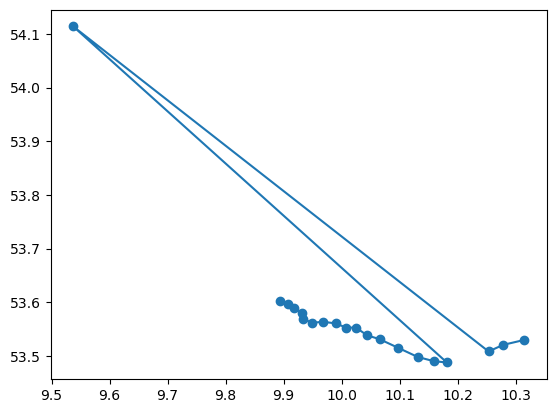

In [33]:
plt.plot(df_s21['LAENGE'], df_s21['BREITE'], '-o')

### Was ist in Zeile 4 passiert?
* Indexzählung beginnt mit 0, betrachte also Index 3

In [34]:
df_s21.iloc[3]

Zugnr                              248206
Station                         Bergedorf
Einsteiger                             43
Aussteiger                              5
dtmIstAnkunftDatum    2016-12-10 09:38:01
dtmIstAbfahrtDatum    2016-12-10 09:38:32
DS100 kurz                            BGS
strKurzbezeichnung                    S21
DS100                                ABGS
NAME                          Beringstedt
LAENGE                           9.537501
BREITE                          54.113667
Name: 3, dtype: object

Bergedorf ist nicht Beringstedt!

In [35]:
stationen.query("NAME == 'Hamburg-Bergedorf'")

,DS100,NAME,LAENGE,BREITE
1700,ABG,Hamburg-Bergedorf,10.206171,53.489832
1700,ABG S,Hamburg-Bergedorf,10.206171,53.489832


In [36]:
stationen.query("NAME == 'Beringstedt'")

,DS100,NAME,LAENGE,BREITE
695,ABGS,Beringstedt,9.537501,54.113667


### Korrigiere DS100-Code von Bergedorf nach `AGB S`
* Erzeuge eine Maske, die angibt, ob die Zeile den falschen DS100-Code enthält.
* Setze den Code in den betreffenden Zeilen des ursprünglichen S-Bahn-Datensatzes korrekt.

In [37]:
is_bergedorf = df['DS100'] == 'ABGS'

In [38]:
is_bergedorf

0         False
1         False
2         False
3          True
4         False
          ...  
610665    False
610666    False
610667    False
610668    False
610669    False
Name: DS100, Length: 610670, dtype: bool

In [39]:
df.loc[is_bergedorf, 'DS100'] = 'ABG S'

In [40]:
df.iloc[:5]

,Zugnr,Station,Einsteiger,Aussteiger,dtmIstAnkunftDatum,dtmIstAbfahrtDatum,DS100 kurz,strKurzbezeichnung,DS100
0,248206,Aumühle,0,0,2016-12-10 09:27:26,2016-12-10 09:28:49,AH,S21,AAH
1,248206,Wohltorf,5,0,2016-12-10 09:31:36,2016-12-10 09:31:55,WLF,S21,AWLF
2,248206,Reinbek,9,0,2016-12-10 09:34:09,2016-12-10 09:34:32,RBK,S21,ARBK
3,248206,Bergedorf,43,5,2016-12-10 09:38:01,2016-12-10 09:38:32,BGS,S21,ABG S
4,248206,Nettelnburg,10,7,2016-12-10 09:40:32,2016-12-10 09:40:57,NTB,S21,ANTB


### Nochmaliges Zusammenfügen der Daten

In [41]:
dfs = df.merge(stationen, how='left', on='DS100')

In [42]:
datum = datetime.date(2016, 12, 10)
df_s21 = dfs.query("Zugnr == '248206' and dtmIstAnkunftDatum.dt.date == @datum")

### Linienführung S21

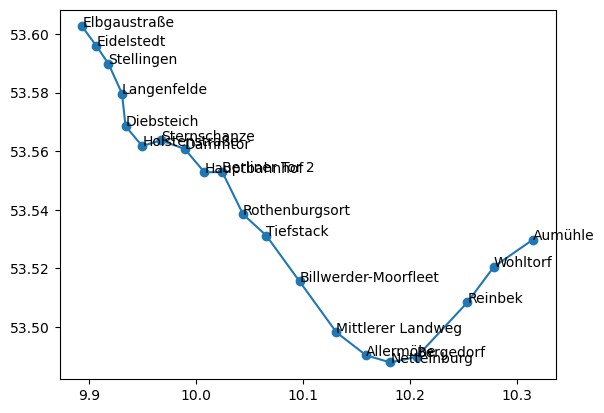

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df_s21['LAENGE'], df_s21['BREITE'], '-o')
for x, y, text in zip(df_s21['LAENGE'], df_s21['BREITE'], df_s21['Station']):
    ax.annotate(text, xy=(x, y))

### Kann eine S-Bahn vor der Ankunft abfahren?

In [44]:
df['Haltedauer'] = (df['dtmIstAbfahrtDatum']-df['dtmIstAnkunftDatum']).dt.total_seconds()

In [45]:
df['Haltedauer'].min(), df['Haltedauer'].max()

(-573.0, 29072.0)

In [46]:
df[df['Haltedauer'] < 0]

,Zugnr,Station,Einsteiger,Aussteiger,dtmIstAnkunftDatum,dtmIstAbfahrtDatum,DS100 kurz,strKurzbezeichnung,DS100,Haltedauer
604579,248277,Stellingen,1,3,2017-03-31 11:59:38,2017-03-31 11:50:05,STS,S21,ASTS,-573.0


In [47]:
df.loc[df['Haltedauer'] < 0, 'Haltedauer'] = np.nan

In [48]:
df.loc[df['Haltedauer'].isnull()]

,Zugnr,Station,Einsteiger,Aussteiger,dtmIstAnkunftDatum,dtmIstAbfahrtDatum,DS100 kurz,strKurzbezeichnung,DS100,Haltedauer
604579,248277,Stellingen,1,3,2017-03-31 11:59:38,2017-03-31 11:50:05,STS,S21,ASTS,NaN


### Verteilung der Haltedauern

In [49]:
df['Haltedauer'].value_counts()

Haltedauer
47.0      19252
48.0      17197
38.0      16408
37.0      16152
26.0      16012
          ...  
1098.0        1
9380.0        1
1594.0        1
9470.0        1
2158.0        1
Name: count, Length: 1646, dtype: int64

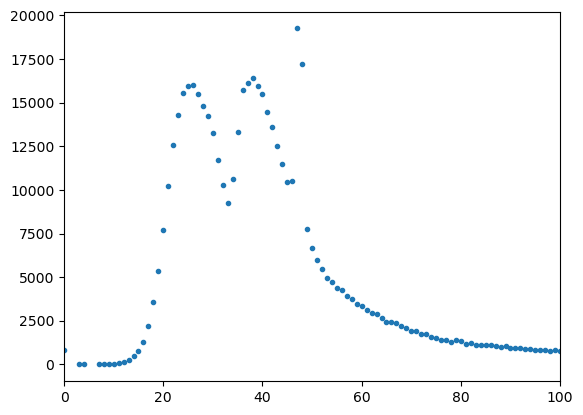

In [50]:
plt.plot(df['Haltedauer'].value_counts(), '.')
plt.xlim(0, 100);

### Hält die S-Bahn am Hauptbahnhof länger?

In [51]:
dfs['Station'].unique()

array(['Aumühle', 'Wohltorf', 'Reinbek', 'Bergedorf', 'Nettelnburg',
       'Allermöhe', 'Mittlerer Landweg', 'Billwerder-Moorfleet',
       'Tiefstack', 'Rothenburgsort', 'Berliner Tor 2', 'Hauptbahnhof',
       'Dammtor', 'Sternschanze', 'Holstenstraße', 'Diebsteich',
       'Langenfelde', 'Stellingen', 'Eidelstedt', 'Elbgaustraße', 'Wedel',
       'Rissen', 'Sülldorf', 'Iserbrook', 'Blankenese', 'Hochkamp',
       'Klein Flottbek', 'Othmarschen', 'Bahrenfeld', 'Altona',
       'Königstraße', 'Reeperbahn', 'Landungsbrücken', 'Stadthausbrücke',
       'Jungfernstieg', 'Berliner Tor 1', 'Landwehr', 'Hasselbrook',
       'Wandsbeker Chaussee', 'Friedrichsberg', 'Barmbek', 'Alte Wöhr',
       'Rübenkamp', 'Ohlsdorf', 'Airport', 'Kornweg', 'Hoheneichen',
       'Wellingsbüttel', 'Poppenbüttel', 'Hammerbrook', 'Veddel',
       'Wilhelmsburg', 'Harburg', 'Harburg-Rathaus', 'Neugraben',
       'Neuwiedenthal', 'Heimfeld', 'Buxtehude', 'Neu Wulmstorf',
       'Fischbek', 'Krupunder', 'Halsten

In [52]:
hbfdata = df[df['Station'] == 'Hauptbahnhof']

In [53]:
hbfdata

,Zugnr,Station,Einsteiger,Aussteiger,dtmIstAnkunftDatum,dtmIstAbfahrtDatum,DS100 kurz,strKurzbezeichnung,DS100,Haltedauer
11,248206,Hauptbahnhof,39,63,2016-12-10 09:58:47,2016-12-10 09:59:34,HS,S21,AHS,47.0
28,248233,Hauptbahnhof,40,57,2016-12-10 10:44:30,2016-12-10 10:50:40,HS,S21,AHS,370.0
51,248266,Hauptbahnhof,50,86,2016-12-10 11:57:53,2016-12-10 11:59:42,HS,S21,AHS,109.0
68,248293,Hauptbahnhof,46,46,2016-12-10 12:44:12,2016-12-10 12:45:01,HS,S21,AHS,49.0
91,248326,Hauptbahnhof,205,103,2016-12-10 13:59:04,2016-12-10 14:01:18,HS,S21,AHS,134.0
...,...,...,...,...,...,...,...,...,...,...
610571,247527,Hauptbahnhof,61,31,2017-03-30 20:34:35,2017-03-30 20:35:33,HS,S1,AHS,58.0
610592,247552,Hauptbahnhof,15,28,2017-03-30 21:30:56,2017-03-30 21:31:45,HS,S1,AHS,49.0
610615,247587k,Hauptbahnhof,49,36,2017-03-30 22:34:39,2017-03-30 22:35:31,HS,S1,AHS,52.0
610641,243047k,Hauptbahnhof,29,10,2017-03-31 06:47:19,2017-03-31 06:48:28,HS,S3,AHS,69.0


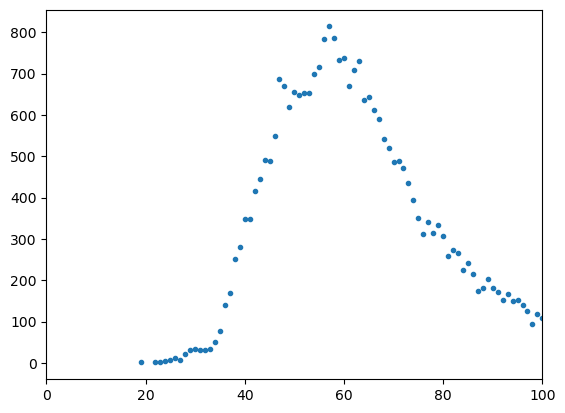

In [54]:
plt.plot(hbfdata['Haltedauer'].value_counts(), '.')
plt.xlim(0, 100);

### Einordnung der Haltedauer in Kategorien

In [55]:
bins = (0, 15, 35, 55, 100, 200, 20000)
pd.cut(df['Haltedauer'], bins=bins)

0          (55, 100]
1           (15, 35]
2           (15, 35]
3           (15, 35]
4           (15, 35]
             ...    
610665      (35, 55]
610666      (15, 35]
610667      (35, 55]
610668      (35, 55]
610669    (100, 200]
Name: Haltedauer, Length: 610670, dtype: category
Categories (6, interval[int64, right]): [(0, 15] < (15, 35] < (35, 55] < (55, 100] < (100, 200] < (200, 20000]]

In [56]:
labels = ['ultrakurz', 'kurz', 'mittel', 'lang', 'sehr lang', 'ultralang']
df['catHaltedauer'] = pd.cut(df['Haltedauer'], bins=bins, labels=labels)

In [57]:
df

,Zugnr,Station,Einsteiger,Aussteiger,dtmIstAnkunftDatum,dtmIstAbfahrtDatum,DS100 kurz,strKurzbezeichnung,DS100,Haltedauer,catHaltedauer
0,248206,Aumühle,0,0,2016-12-10 09:27:26,2016-12-10 09:28:49,AH,S21,AAH,83.0,lang
1,248206,Wohltorf,5,0,2016-12-10 09:31:36,2016-12-10 09:31:55,WLF,S21,AWLF,19.0,kurz
2,248206,Reinbek,9,0,2016-12-10 09:34:09,2016-12-10 09:34:32,RBK,S21,ARBK,23.0,kurz
3,248206,Bergedorf,43,5,2016-12-10 09:38:01,2016-12-10 09:38:32,BGS,S21,ABG S,31.0,kurz
4,248206,Nettelnburg,10,7,2016-12-10 09:40:32,2016-12-10 09:40:57,NTB,S21,ANTB,25.0,kurz
...,...,...,...,...,...,...,...,...,...,...,...
610665,243064k,Diebsteich,2,8,2017-03-31 08:13:03,2017-03-31 08:13:41,DT,S3,ADT,38.0,mittel
610666,243064k,Langenfelde,0,0,2017-03-31 08:14:53,2017-03-31 08:15:28,LST,S3,ALST,35.0,kurz
610667,243064k,Stellingen,0,2,2017-03-31 08:16:49,2017-03-31 08:17:28,STS,S3,ASTS,39.0,mittel
610668,243064k,Eidelstedt,0,0,2017-03-31 08:19:00,2017-03-31 08:19:41,EST,S3,AEST,41.0,mittel


In [58]:
df['catHaltedauer']

0              lang
1              kurz
2              kurz
3              kurz
4              kurz
            ...    
610665       mittel
610666         kurz
610667       mittel
610668       mittel
610669    sehr lang
Name: catHaltedauer, Length: 610670, dtype: category
Categories (6, object): ['ultrakurz' < 'kurz' < 'mittel' < 'lang' < 'sehr lang' < 'ultralang']

In [59]:
df.loc[0, 'catHaltedauer'] < df.loc[1, 'catHaltedauer']

False

In [60]:
df.loc[610668, 'catHaltedauer'] < df.loc[610669, 'catHaltedauer']

True

### Zahl der Ein- und Aussteiger im Laufe des Tages

In [61]:
df['Ankunft'] = df['dtmIstAnkunftDatum'].dt.hour*60 + df['dtmIstAnkunftDatum'].dt.minute

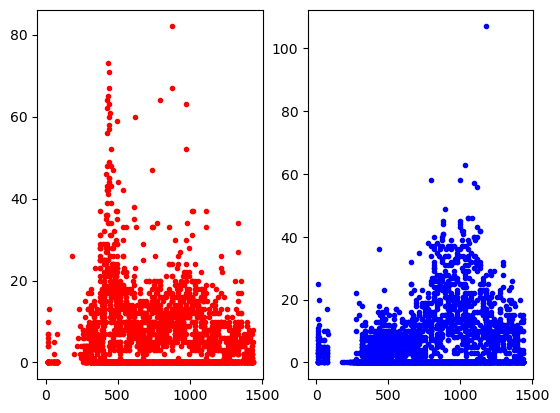

In [62]:
station = "Aumühle"
fig, (ax0, ax1) = plt.subplots(1, 2)
df_station = df.query("Station == @station")
ax0.plot(df_station['Ankunft'], df_station['Einsteiger'], 'r.')
ax1.plot(df_station['Ankunft'], df_station['Aussteiger'], 'b.')

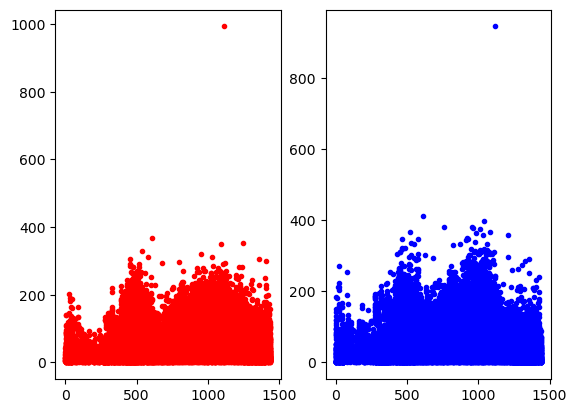

In [63]:
station = "Hauptbahnhof"
fig, (ax0, ax1) = plt.subplots(1, 2)
df_station = df.query("Station == @station")
ax0.plot(df_station['Ankunft'], df_station['Einsteiger'], 'r.')
ax1.plot(df_station['Ankunft'], df_station['Aussteiger'], 'b.')